# Importing libraries and dataset

In [1]:
# Importing warning filter

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from statsmodels.stats import weightstats as stests

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 

In [3]:
# Reading the dataset

df = pd.read_csv('CO2_Emissions_Canada.csv')

The dataset for this study is called “CO2_Emissions_Canada” and it was found at Kaggle website[1].

1: https://www.kaggle.com/debajyotipodder/co2-emission-by-vehicles

# Data Understanding

The info() function prints a concise summary of a dataset, including its index dtype and columns, non-null values and memory usage. A Data Dictionary can be found at the Appendix of the report.

In [4]:
# Obtaining basic information about the the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In the sequence, it is possible to observe samples of the dataset by applying the Pandas functions head() and tail().

In [5]:
# Observing a sample of the dataset - head

df.head(50)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [6]:
# Observing a sample of the dataset - tail

df.tail(10)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
7375,VOLVO,S90 T6 AWD,MID-SIZE,2.0,4,AS8,Z,11.3,7.5,9.6,29,223
7376,VOLVO,V60 T5,STATION WAGON - SMALL,2.0,4,AS8,Z,10.5,7.1,8.9,32,208
7377,VOLVO,V60 T6 AWD,STATION WAGON - SMALL,2.0,4,AS8,Z,11.0,7.4,9.4,30,219
7378,VOLVO,V60 CC T5 AWD,STATION WAGON - SMALL,2.0,4,AS8,Z,10.8,7.7,9.4,30,220
7379,VOLVO,XC40 T4 AWD,SUV - SMALL,2.0,4,AS8,X,10.2,7.5,9.0,31,210
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7384,VOLVO,XC90 T6 AWD,SUV - STANDARD,2.0,4,AS8,Z,12.2,8.7,10.7,26,248


While checking for duplicates, 1103 duplicated rows were found and removed. No missing values were found, though.

In [7]:
# Checking if there are any missing values

df.isnull().values.any()

False

In [8]:
# Checking for duplicates

df.duplicated().sum()
print('There are a total of ' + (str(df.duplicated().sum()) + ' duplicates in the dataset.'))

There are a total of 1103 duplicates in the dataset.


In [9]:
# Removing duplicates

df.drop_duplicates(inplace = True)
df.duplicated().sum()
print('There are a total of ' + (str(df.duplicated().sum()) + ' duplicates in the dataset.'))

There are a total of 0 duplicates in the dataset.


It is possible to see that the number of entries is now 6282 instead of the initial 7385. This is due to the removal of the duplicates. After that, the index was reset so it would follow the new shape, going from 0 to 6281.

In [10]:
# Checking the new shape of the dataset

df.shape

(6282, 12)

In [11]:
# Reseting the index

df = df.reset_index(drop = True)
df.tail()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
6277,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
6278,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
6279,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
6280,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
6281,VOLVO,XC90 T6 AWD,SUV - STANDARD,2.0,4,AS8,Z,12.2,8.7,10.7,26,248


Exploring the statistical summary of the dataset, this shows the following values for each variable: count, mean, std, min, 25%, 50%, 75% and max. 

In [12]:
# Obtaining a statistical summary for the dataset

df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000
mean,3.161812,5.618911,12.610220,9.070583,11.017876,27.411016,251.157752
std,1.365201,1.846250,3.553066,2.278884,2.946876,7.245318,59.290426
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.700000,10.300000,12.700000,32.000000,289.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


As this summary is only applied for numerical variables, all the categorical variables were counted for unique values next. The first item on each list represents the mode of the column, meaning the value that is more frequent on it.

In [13]:
# Counting unique values for 'Make'

df['Make'].value_counts()

FORD             577
CHEVROLET        515
BMW              501
MERCEDES-BENZ    365
PORSCHE          296
GMC              289
TOYOTA           276
AUDI             263
NISSAN           213
MINI             200
JEEP             200
KIA              192
VOLKSWAGEN       187
HYUNDAI          184
DODGE            180
HONDA            164
CADILLAC         141
LEXUS            129
MAZDA            127
SUBARU           119
JAGUAR           118
VOLVO            118
BUICK             92
INFINITI          87
LINCOLN           81
LAND ROVER        76
MITSUBISHI        73
RAM               72
CHRYSLER          64
FIAT              56
MASERATI          52
ACURA             51
ROLLS-ROYCE       48
ASTON MARTIN      39
LAMBORGHINI       37
BENTLEY           35
SCION             21
ALFA ROMEO        19
GENESIS           14
SMART              7
SRT                2
BUGATTI            2
Name: Make, dtype: int64

In [14]:
# Counting unique values for 'Model'

df['Model'].value_counts()

F-150 FFV             32
F-150 FFV 4X4         31
MUSTANG               27
FOCUS FFV             24
F-150 4X4             20
                      ..
LS 500                 1
LS 500h                1
NX 300 AWD F SPORT     1
RX 350 L AWD           1
XC40 T4 AWD            1
Name: Model, Length: 2053, dtype: int64

In [15]:
# Counting unique values for 'Vehicle Class'

df['Vehicle Class'].value_counts()

SUV - SMALL                 1006
MID-SIZE                     983
COMPACT                      903
SUV - STANDARD               613
SUBCOMPACT                   533
FULL-SIZE                    508
PICKUP TRUCK - STANDARD      475
TWO-SEATER                   381
MINICOMPACT                  274
STATION WAGON - SMALL        214
PICKUP TRUCK - SMALL         133
VAN - PASSENGER               66
SPECIAL PURPOSE VEHICLE       65
MINIVAN                       61
STATION WAGON - MID-SIZE      45
VAN - CARGO                   22
Name: Vehicle Class, dtype: int64

In [16]:
# Counting unique values for 'Transmission'

df['Transmission'].value_counts()

AS6     1139
AS8     1056
M6       773
A6       684
AM7      383
A8       378
AS7      283
A9       263
AV       241
M5       168
AS10     151
AM6      107
AV7       92
AV6       89
A5        78
M7        78
AS9       65
A4        61
AM8       45
A7        44
AV8       34
A10       28
AS5       26
AV10       9
AM5        4
AS4        2
AM9        1
Name: Transmission, dtype: int64

In [17]:
# Counting unique values for 'Fuel Type'

df['Fuel Type'].value_counts()

X    3039
Z    2765
E     330
D     147
N       1
Name: Fuel Type, dtype: int64

Histograms and boxplots were plotted, next, to check the distribution and look for outliers in the numerical variables.

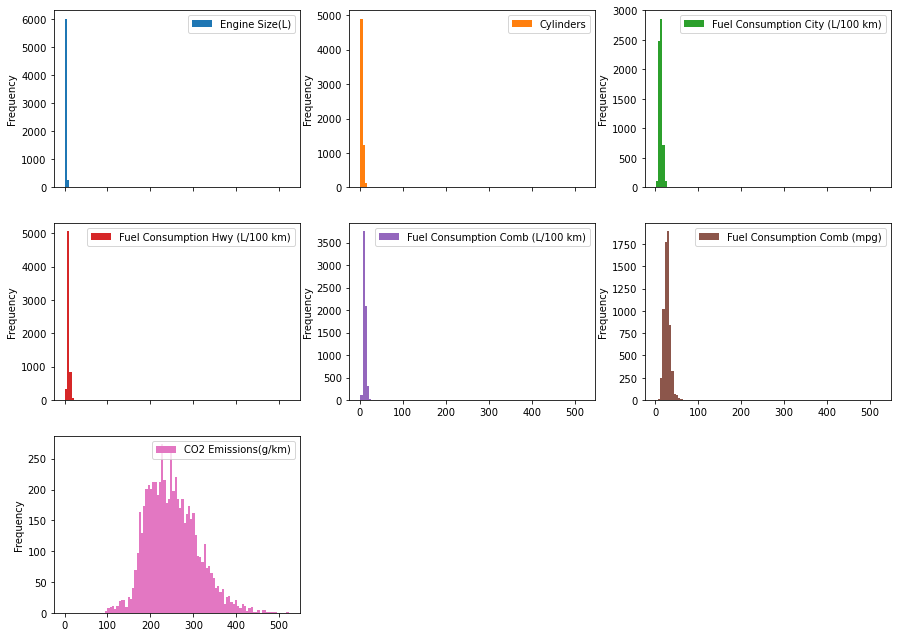

In [18]:
# Observing the distribution of the numerical variables

df.plot(kind = 'hist', subplots = True, layout = (4, 3), figsize = (15, 15), bins = 100);

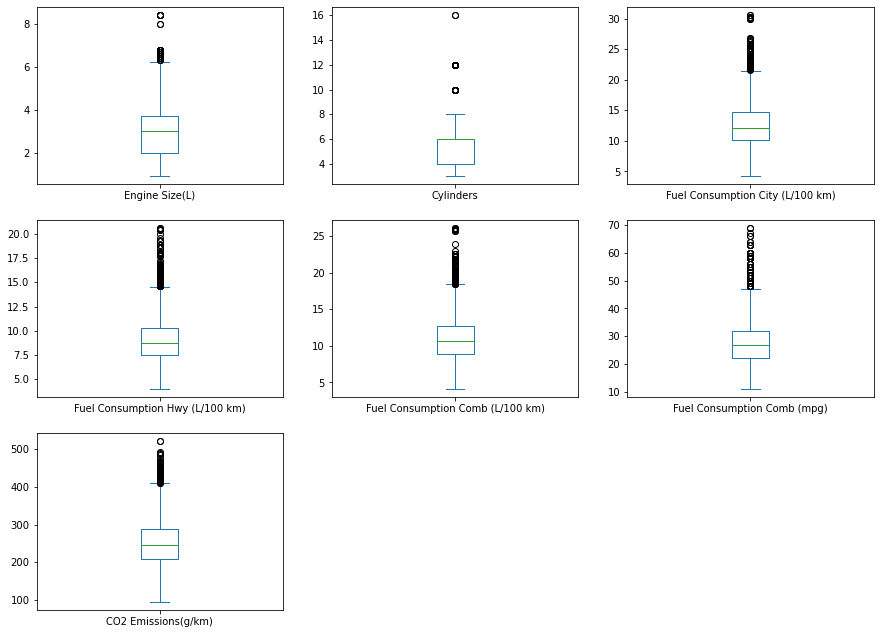

In [19]:
# Checking for outliers

df.plot(kind = 'box', subplots = True, layout = (4, 3), figsize = (15, 15));

## - First section: Hypothesis Test

According to the United States Environmental Protection Agency (US EPA), the average passenger vehicle emits about 404 grams of CO2 per mile. That is the mean of the population. Converting the distance to km, which is the measure used in the dataset – the sample to be tested, the average passenger vehicle emits about 251 grams of CO2 per km.

So the null hypothesis is that the average passenger vehicle emits 251 grams of CO2 per km. The alternative hypotheses, on the other hand, is that the average passenger vehicle emits more than 251 grams of CO2 per km, as the mean of the sample is 251.15 g/km, as seen in the 5-number summary previously. So this will be a right-tailed test.

In [20]:
# Hypothesis Test

## H0 = The average passenger vehicle in Canada emits 251g/km of CO2 => μ = 251
## H1 = The average passenger vehicle in Canada emits more the 251g/km of CO2 => μ > 251

ztest, pval = stests.ztest(df['CO2 Emissions(g/km)'], x2 = None, value = 251, alternative = 'larger')
print(float(ztest))
print(float(pval))

if pval < 0.10: # Alpha value is 0.05 or 5%
    print('Reject the null hypothesis.')
else:
    print('Accept the null hypothesis.')

0.2108822926538648
0.41648956091534317
Accept the null hypothesis.


# Data Preparation

As the categorical columns “Make”, “Model”, “Vehicle Class” and “Transmission” have numerous unique observations, encoding them would make the dataset extremely large in number of columns. So, they were dropped.

The only column that will be encoded is “Fuel Type”, so it will be possible to include it in the correlation analysis. The OneHotEncoder was the chosen method, because it derives the categories based on the unique values of the feature and does not create any unwanted rank, as it would be with the OrdinalEncoder. The “Fuel Type” variable has only 5 unique observation, but one of them appears just once, so it was dropped. It is the letter N, that represents the natural gas. After that, index was reset.

In [21]:
# Dropping all the categorical variables, except 'Fuel Type'

df = df.drop(columns = ['Make', 'Model', 'Vehicle Class', 'Transmission'], axis = 1)

In [22]:
# Dropping the only observation with 'Fuel Type' = N

df = df[df['Fuel Type'] != 'N']
df = df.reset_index(drop = True)
df.shape

(6281, 8)

The “Fuel Type” column is, then, encoded as a new dataset and, following, its columns are renamed accordingly.

In [23]:
# Transforming the categorical column in an list of array

fuel_type = df['Fuel Type'].array
fuel_type = fuel_type.reshape(-1, 1)

In [24]:
# Enconding the variable 'Fuel Type'

ohe = OneHotEncoder(sparse = False)
df_fuel_type = ohe.fit_transform(fuel_type)
df_fuel_type = pd.DataFrame(df_fuel_type)
df_fuel_type.head(50)

,0,1,2,3
0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0
5,0.0,0.0,0.0,1.0
6,0.0,0.0,0.0,1.0
7,0.0,0.0,0.0,1.0
8,0.0,0.0,0.0,1.0
9,0.0,0.0,0.0,1.0


In [25]:
#Checking the tail of the encoded dataset

df_fuel_type.tail(10)

,0,1,2,3
6271,0.0,0.0,0.0,1.0
6272,0.0,0.0,0.0,1.0
6273,0.0,0.0,0.0,1.0
6274,0.0,0.0,0.0,1.0
6275,0.0,0.0,1.0,0.0
6276,0.0,0.0,0.0,1.0
6277,0.0,0.0,0.0,1.0
6278,0.0,0.0,0.0,1.0
6279,0.0,0.0,0.0,1.0
6280,0.0,0.0,0.0,1.0


In [26]:
# Renaming the new columns of the encoded dataset

df_fuel_type.columns = ['Fuel_D', 'Fuel_E', 'Fuel_X', 'Fuel_Z']
df_fuel_type

,Fuel_D,Fuel_E,Fuel_X,Fuel_Z
0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0
...,...,...,...,...
6276,0.0,0.0,0.0,1.0
6277,0.0,0.0,0.0,1.0
6278,0.0,0.0,0.0,1.0
6279,0.0,0.0,0.0,1.0


Finally, this new dataset is joined to the original one and the original column “Fuel Type” is dropped.

In [27]:
# Joining the dataframes in one

df = df.join(df_fuel_type)
df = df.drop(columns = 'Fuel Type', axis = 1)
df

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Fuel_D,Fuel_E,Fuel_X,Fuel_Z
0,2.0,4,9.9,6.7,8.5,33,196,0.0,0.0,0.0,1.0
1,2.4,4,11.2,7.7,9.6,29,221,0.0,0.0,0.0,1.0
2,1.5,4,6.0,5.8,5.9,48,136,0.0,0.0,0.0,1.0
3,3.5,6,12.7,9.1,11.1,25,255,0.0,0.0,0.0,1.0
4,3.5,6,12.1,8.7,10.6,27,244,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
6276,2.0,4,10.7,7.7,9.4,30,219,0.0,0.0,0.0,1.0
6277,2.0,4,11.2,8.3,9.9,29,232,0.0,0.0,0.0,1.0
6278,2.0,4,11.7,8.6,10.3,27,240,0.0,0.0,0.0,1.0
6279,2.0,4,11.2,8.3,9.9,29,232,0.0,0.0,0.0,1.0


## - Second section: Correlation Analysis (2 variables)

Before analysing the correlation between 2 specific variables, a heatmap and a pairplot were plotted for the whole dataset, in order to observe the correlation between all the variables and choose 2 for further analysis.

In the heatmap, it can be seen that all the fuel types do not have a strong correlation with “CO2 Emissions(g/km)”. On the other hand, “Engine Size(L)”, “Cylinders” and all types of fuel consumption have a strong correlation with CO2 emissions, having only one of them a negative correlation (“Fuel Consumption Comb (mpg)”).

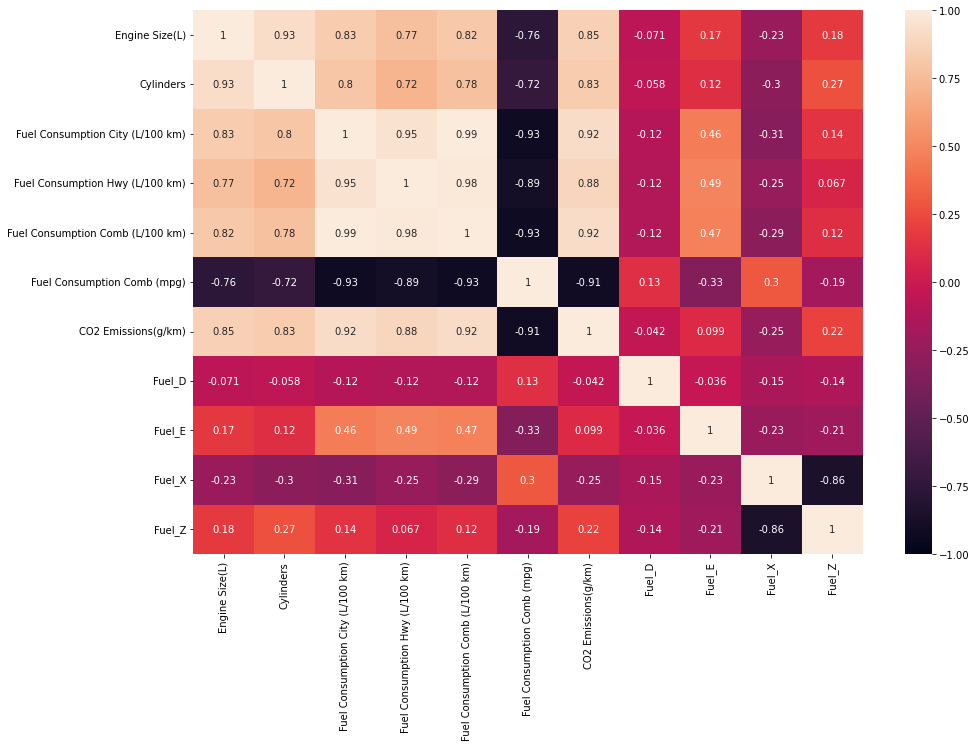

In [28]:
# Analysing the correlation between all variables

plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), vmin = -1, vmax = 1, annot = True);

The strongest correlations with “CO2 Emissions(g/km)” mentioned above can be seen in the pairplot as linears. “Fuel Consumption Comb (mpg)” is the only one that moves downwards, as this is a negative correlation,and has a curved shape.

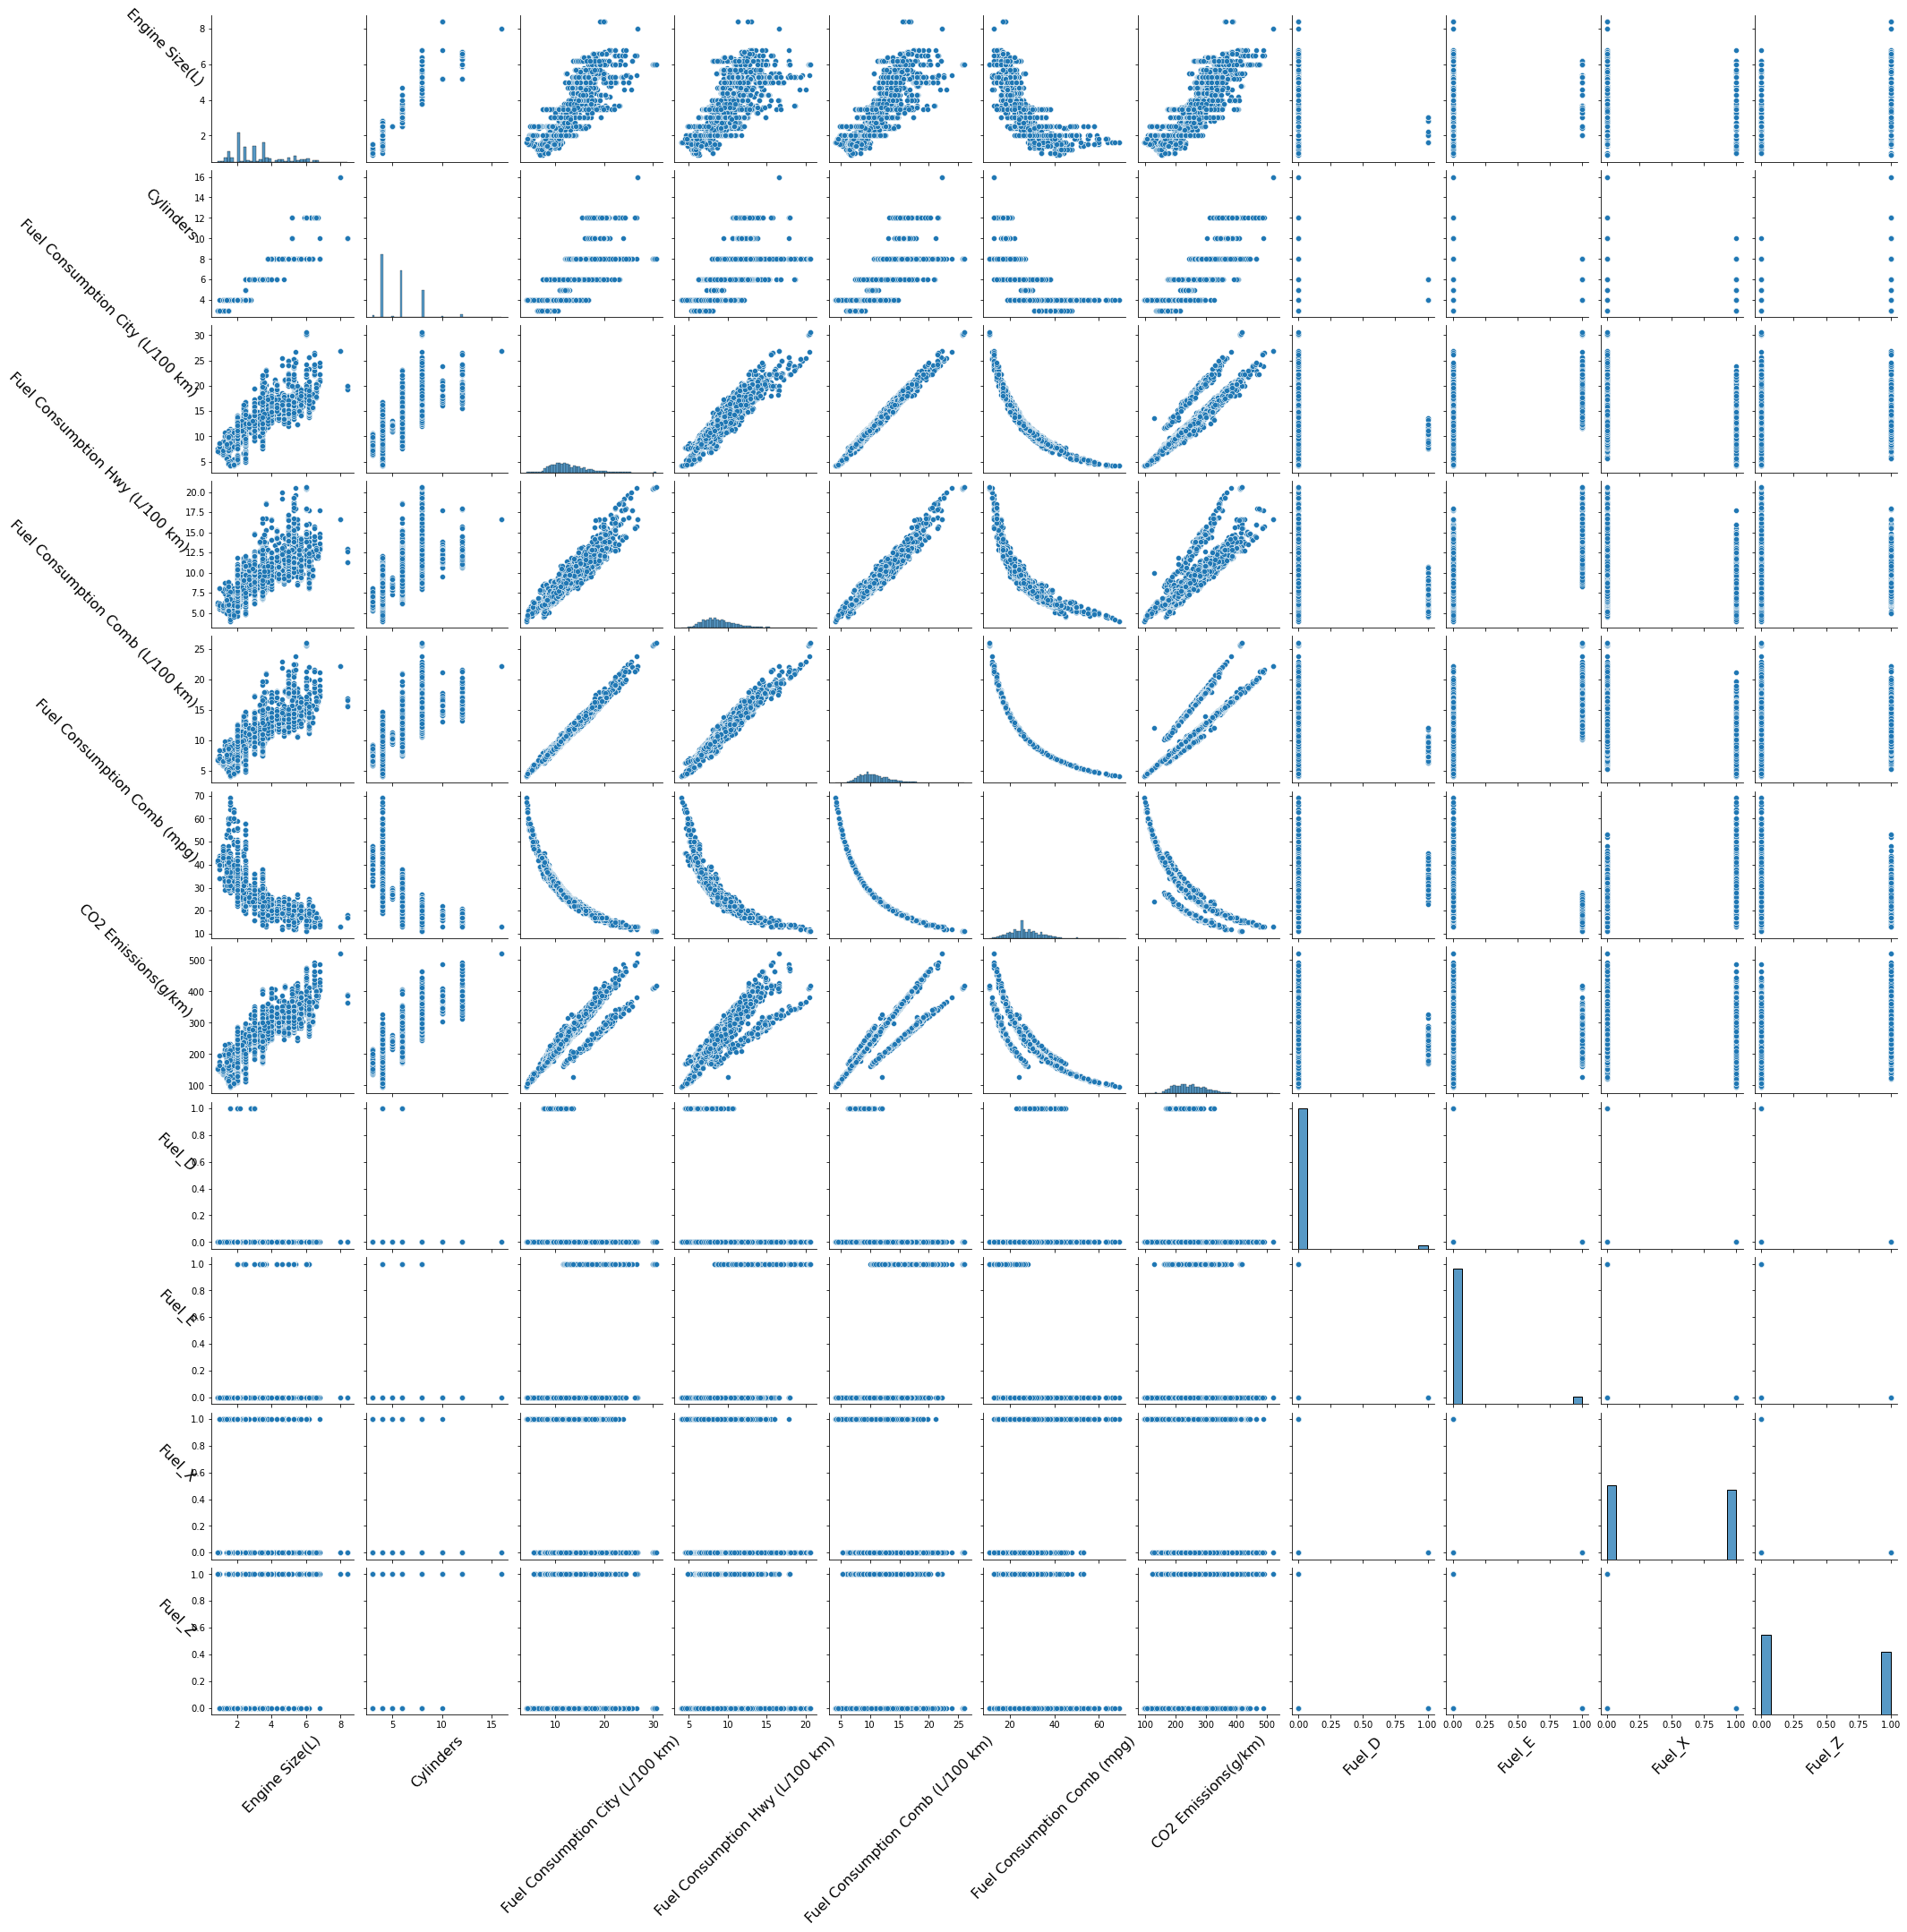

In [29]:
# Analysing the correlation between all variables - pairplot

all_pairs = sns.pairplot(df)

for ax in all_pairs.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), rotation = 45, fontsize = 16)
    ax.set_ylabel(ax.get_ylabel(), rotation = -45, fontsize = 16)
    ax.yaxis.get_label().set_horizontalalignment('right')

Although the strongest correlation with “CO2 Emissions(g/km)” is represented by “Fuel Consumption Comb (L/100 km)” and “Fuel Consumption City (L/100km)”, it is already known that fuel consumption influences the emissions of CO2. So, in this case, the variable that was chosen for further analysis was “Engine Size(L)”. The line is not well defined as the ones representing the strongest correlations, but the goal is to see if it is possible to predict CO2 emissions from the size of the engine of a car.

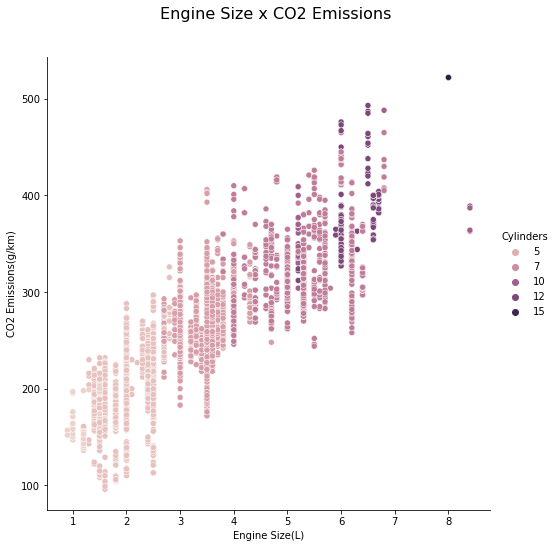

In [30]:
# Analysing the correlation between Engine Size and CO2 emissions


fuelcc_co2 = sns.pairplot(
    df,
    x_vars = ['Engine Size(L)'],
    y_vars = ['CO2 Emissions(g/km)'],
    hue = 'Cylinders',
    height = 7
)

fuelcc_co2.fig.suptitle("Engine Size x CO2 Emissions", y = 1.08, fontsize = 16);

# Modelling

## - Third section: Build a Linear Regression Model

### -- Linear Regression with Numpy Polyfit

With Numpy Polyfit it is possible to build a linear regression in Python. The function fits a polynomial to points X and y of the variables chosen and returns a vector of coefficients that minimises the squared error. 

In [31]:
# Splitting the dataset into X and y

X = df.iloc[: , 0] #Engine Size(L)
y = df.iloc[: , -5] #CO2 Emissions(g/km)

In [32]:
# Finding the best polynomial fit

reg_pol = np.polyfit(X, y, 1)
reg_pol

array([ 37.12590239, 133.78131143])

The output gives: a = 133.78 and b = 37.12.
With this two values we can now present our Lineal Regression Model: 
    
* Engine Size: E
* CO2: C

Linear Regression Model: **C = 133.78 + 37.12*E**

In [33]:
# Predicting with Linear Regression - Numpy Polyfit

# Engine size = 4.5
pred_pol = np.poly1d(reg_pol)
pred_pol(4.5)

300.8478721693691

In [34]:
# Calculating the accuracy of the Linear Regression - Numpy Polyfit

print('The accuracy of the Linear Regression with Numpy Polyfit is ' + str(r2_score(y, pred_pol(X))) + '.')

The accuracy of the Linear Regression with Numpy Polyfit is 0.7308021380134937.


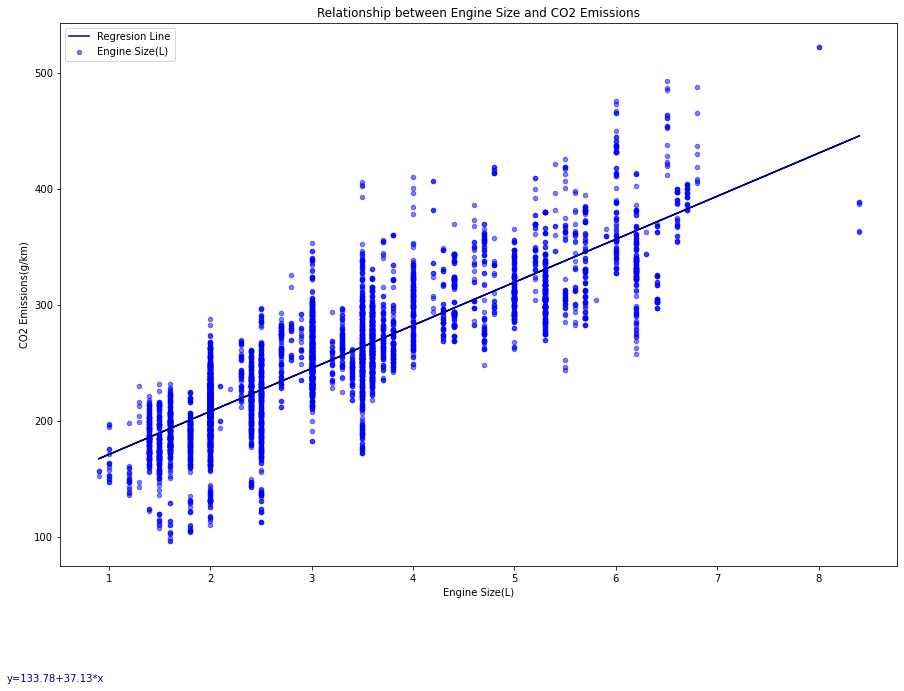

In [35]:
# Plotting scatter plots and regression lines

# Scatter plots
ax1 = df.plot(kind = 'scatter', x = 'Engine Size(L)', y = 'CO2 Emissions(g/km)', color = 'blue', alpha = 0.5, figsize = (15, 10))

# Regression lines
plt.plot(X, reg_pol[0] * X + reg_pol[1], color = 'darkblue')

# Regression equations
plt.text(0, -25, 'y={:.2f}+{:.2f}*x'.format( reg_pol[1],  reg_pol[0]), color = 'darkblue')

# legend, title and labels
plt.legend(labels = ['Regresion Line', 'Engine Size(L)', 'CO2 Emissions(g/km)'])
plt.title('Relationship between Engine Size and CO2 Emissions')
plt.xlabel('Engine Size(L)')
plt.ylabel('CO2 Emissions(g/km)');

### -- Linear Regression with Scikit-Learn - data not splitted into training and test set

In [36]:
# Creating linear regression object
reg_skl = LinearRegression()

# Fitting linear regression
reg_skl.fit(df[['Engine Size(L)']], df['CO2 Emissions(g/km)'])

# Getting the slope and intercept of the line best fit
print(reg_skl.intercept_)
print(reg_skl.coef_)

133.78131143234498
[37.12590239]


In [37]:
# Predicting the test set results for Linear Regression Scikit-Learn

y_pred = reg_skl.predict(X.array.reshape(-1, 1))
print(np.concatenate((y_pred.reshape(len(y_pred),1), y.values.reshape(len(y),1)),1))

[[208.0331162  196.        ]
 [222.88347716 221.        ]
 [189.47016501 136.        ]
 ...
 [208.0331162  240.        ]
 [208.0331162  232.        ]
 [208.0331162  248.        ]]


In [38]:
# Calculating the accuracy of the Linear Regression Scikit-Learn using the train / test split

print('The accuracy of the Linear Regression model, not using the train/test split is ' + str(reg_skl.score(X.array.reshape(-1, 1), y)) + '.')

The accuracy of the Linear Regression model, not using the train/test split is 0.7308021380134937.


### -- Linear Regression from Scikit-Learn - splitting the dataset intro training and test set

In [39]:
# Splitting the scaled dataset into the training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [40]:
# Training the Linear Regression Scikit-Learn on the training set

reg_skl_train = LinearRegression()
reg_skl_train.fit(X_train.array.reshape(-1, 1), y_train)

LinearRegression()

In [41]:
# Predicting the test set results for Linear Regression Scikit-Learn

y_pred_train = reg_skl_train.predict(X_test.array.reshape(-1, 1))
print(np.concatenate((y_pred_train.reshape(len(y_pred_train),1), y_test.values.reshape(len(y_test),1)),1))

[[245.03039875 298.        ]
 [245.03039875 296.        ]
 [267.1861736  300.        ]
 ...
 [267.1861736  279.        ]
 [200.71884905 187.        ]
 [208.10410734 194.        ]]


In [42]:
# Calculating the accuracy of the Linear Regression Scikit-Learn using the train / test split

print('The accuracy of the Linear Regression model, using the train/test split is ' + str(reg_skl_train.score(X_train.array.reshape(-1, 1), y_train)) + '.')

The accuracy of the Linear Regression model, using the train/test split is 0.7285316252877991.


### -- Comparing predictions and accuracy in the three scenarios

In [43]:
# Comparing predictions of CO2 emissions for Engine Size = 4.5

# Polynomial Numpy
print(np.polyval(reg_pol, [4.5]))

# Linear Regression Scikit-Learn - without splitting the dataset into training and test set
print(reg_skl.predict([[4.5]]))

# Linear Regression Scikit-Learn - splitting the dataset into training and test set
print(reg_skl_train.predict([[4.5]]))

[300.84787217]
[300.84787217]
[300.41983588]


In [44]:
# Comparing accuracy of the linear regression

# Accuracy of the Linear Regression - Numpy Polyfit
acc_pol = r2_score(y, pred_pol(X))
print(acc_pol)

# Accuracy of the Linear Regression Scikit-Learn - data not splitted
acc_skl = reg_skl.score(X.array.reshape(-1, 1), y)
print(acc_skl)

# Accuracy of the Linear Regression Scikit-Learn using the train / test split
acc_skl_train = reg_skl_train.score(X_train.array.reshape(-1, 1), y_train)
print(acc_skl_train)

0.7308021380134937
0.7308021380134937
0.7285316252877991
